

A partir dos dados sinteticamente gerados, treine dois preditores utilizando o framework do Scikit-Learn: um preditor por Regressão Linear e outro por Regressão Logística. Sinta-se livre para acrescentar colunas ao dataset ou ainda modificar as existentes se julgar necessário.

Pesquise maneiras de avaliar a performance dos modelos de regressão linear e de regressão logísitica.

Elabore um relatório sobre o treinamento dos modelos em um caderno Jupyter e o submeta como conclusão desta atividade.

In [1]:
# Adicionando o pacote geração de dados ao sys.path
import sys
sys.path.append('/home/gustavo/Área de Trabalho/PUC-CDIA/Projeto Integrado/gerador-datasets-estudantes')

# Gerando dados aleatórios
from cdia.datasets import DatasetEstudantes
n_amostra = 10000

#  O método criar retorna um DataFrame (Pandas)
df = DatasetEstudantes.criar(n_amostra)
df.head()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,numero,bairro,cidade,uf,cep,motivação
0,RA55000001,Tiarlis Roriz Lara Conde,18,73.0,1,1,3,1,24,Praça Opala,269,Vila Euthalia,São Paulo,SP,03518-065,10
1,RA55000002,Daici Cancela Veleda,18,80.0,1,2,3,1,107,Avenida Nove de Julho,947,Jardim Paulista,São Paulo,SP,01406-100,10
2,RA55000003,Jonis Cavaco Cabral,18,35.0,2,1,3,1,15,Avenida Nove de Julho,506,Jardim Paulista,São Paulo,SP,01406-901,9
3,RA55000004,Emily Ornelas Moreira,18,230.0,1,2,3,1,101,Rua Major João Nunes,800,Jardim São Paulo(Zona Norte),São Paulo,SP,02046-070,9
4,RA55000005,Augusta Teixeira Murtinho Aquino,18,456.0,1,2,3,1,33,Rua Almeida Campos,300,Vila Paulicéia,São Paulo,SP,02302-010,9


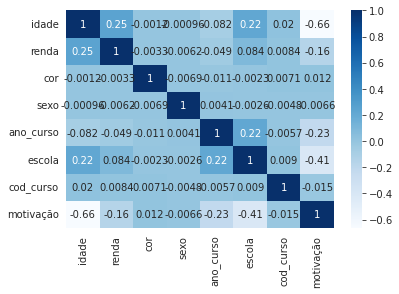

In [2]:
# Vendo a correlação dos dados
import seaborn as sb
sb.heatmap(df.corr(), annot=True, cmap='Blues');

In [3]:
from sklearn.model_selection import train_test_split

# Filtrando dados para o modelo de regressão linear
features = df[['idade', 'cor', 'sexo', 'ano_curso', 'escola', 'cod_curso', 'renda']]
target = df['motivação']

# Separando os dados de treino e teste
features_treino, features_teste, target_treino, target_teste = train_test_split(features, target, test_size=0.33, random_state=42)

## Criando e avaliando o modelo para previão de motivação dos estudantes

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

modelo_linear = LinearRegression()

modelo_linear.fit(features_treino, target_treino)

def avalia_modelo_linear(modelo, features_teste, target_teste, casas_decimais=3):
    predicao = modelo.predict(features_teste)
    mse = metrics.mean_squared_error(target_teste, predicao)
    print('Erro quadrático médio:', round(mse, casas_decimais))
    print('Raiz quadrada do erro médio:', round(np.sqrt(mse), casas_decimais))
    print('Erro médio absoluto:', round(metrics.mean_absolute_error(target_teste, predicao), casas_decimais))
    print('R quadrado:', round(metrics.r2_score(target_teste, predicao), casas_decimais))

avalia_modelo_linear(modelo_linear, features_teste, target_teste)

Erro quadrático médio: 4.371
Raiz quadrada do erro médio: 2.091
Erro médio absoluto: 1.669
R quadrado: 0.559


## Criando e avaliando o modelo para determinar se o aluno estudou em escola pública ou privada

In [7]:
from sklearn.linear_model import LogisticRegression

# Filtrando dados para o modelo de regressão linear
features = df[['idade', 'motivação', 'sexo', 'ano_curso', 'cor', 'cod_curso', 'renda', 'uf']]
target = df['escola']

# Separando os dados de treino e teste
features_treino, features_teste, target_treino, target_teste = train_test_split(features, target, test_size=0.33, random_state=42)


modelo_logistico = LogisticRegression()
modelo_logistico.fit(features_treino, target_treino)


def avalia_modelo_de_classificacao(modelo, features_teste, target_teste, casas_decimais=3):
    predicao = modelo.predict(features_teste)
    acuracia = metrics.accuracy_score(target_teste, predicao)
    print('Acurácia:', round(acuracia, casas_decimais))
    print('Precisão:', round(metrics.precision_score(target_teste, predicao), casas_decimais))
    print('Recall:', round(metrics.recall_score(target_teste, predicao), casas_decimais))
    print('F1 Score:', round(metrics.f1_score(target_teste, predicao), casas_decimais))

avalia_modelo_de_classificacao(modelo_logistico, features_teste, target_teste)

ValueError: could not convert string to float: 'SP'

In [6]:
from itertools import cycle


A = [' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','ç']


def cifraPos(s, x, offset=3):
    if not x in range(len(s) + 1):
        raise ValueError('x deve estar entre 0 e ' + str(len(s)))

    return x + offset if 1 <= x <= len(s) and x + offset <= len(s) else (x + offset) - len(s)


def cifraPosv2(s, x):
    idx = x + 3
    while idx > len(s):
        idx -= len(s)
    return idx

cifraPos(A, 28), cifraPosv2(A, 54)


(3, 1)